In [1]:
import pandas as pd
import re
from langdetect import detect

# ÏâºÌëúÍ∞Ä Ìè¨Ìï®Îêú CSV ÌååÏùº ÏùΩÍ∏∞ - Î™®Îì† ÌïÑÎìúÎ•º ÌïòÎÇòÏùò Ïª¨ÎüºÏúºÎ°ú Ï≤òÎ¶¨
df = pd.read_csv('.data/parasite_reviews.csv')

print(f"Ï†ÑÏ≤¥ Î¶¨Î∑∞: {len(df)}Í∞ú")

# Ïñ∏Ïñ¥ Í∞êÏßÄ Ìï®Ïàò
def detect_language(text):
    try:
        return detect(str(text))
    except:
        return None

df['language'] = df['review_text'].apply(detect_language)
df = df[df['language'] == 'en'].copy()

print(f"ÏòÅÏñ¥ Î¶¨Î∑∞: {len(df)}Í∞ú")
df_review = df[['review_text']].copy()
df_review['review_text'] = df_review['review_text'].str.lower()

print("\nÏ≤´ 10Í∞ú ÏÉòÌîå:")
print(df_review.head(10))

Ï†ÑÏ≤¥ Î¶¨Î∑∞: 1413Í∞ú
ÏòÅÏñ¥ Î¶¨Î∑∞: 1294Í∞ú

Ï≤´ 10Í∞ú ÏÉòÌîå:
                                          review_text
1   parasite is a masterful achievement that showc...
2   parasite is a remarkable film that really spea...
3   a well-crafted mix of suspenseful drama and da...
4   an unforgettable masterpiece... a cinematic ro...
7   parasite has been widely praised for its craft...
8   i don't know why but i got soo easily attached...
9   absolute dog****. you mean to tell me that thi...
11  parasite is a masterclass in directing and scr...
12  bong joon ho's masterpiece "parasite" deserves...
13  film with a particular and functional atmosphe...


In [2]:
df_review['review_text'] = df_review['review_text'].apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x))
df_review.head(10)

review_text
1   parasite is a masterful achievement that showc...
2   parasite is a remarkable film that really spea...
3   a wellcrafted mix of suspenseful drama and dar...
4   an unforgettable masterpiece a cinematic rolle...
7   parasite has been widely praised for its craft...
8   i dont know why but i got soo easily attached ...
9   absolute dog you mean to tell me that this stu...
11  parasite is a masterclass in directing and scr...
12  bong joon hos masterpiece parasite deserves ev...
13  film with a particular and functional atmosphe...

In [3]:
print(f"Ï¥ù Î¶¨Î∑∞ Ïàò: {len(df_review)}")
full_reviews = df_review['review_text'].isna()
print(f'empty_reviews : {full_reviews.sum()}')

Ï¥ù Î¶¨Î∑∞ Ïàò: 1294
empty_reviews : 0


In [4]:
multiple_spaces = df_review['review_text'].str.contains("  ")
print(f"Ïó¨Îü¨ Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞: {multiple_spaces.sum()}Í∞ú")
if multiple_spaces.sum() > 0:
    print("ÏòàÏãú:")
    print(df_review[multiple_spaces]['review_text'].head(10))

Ïó¨Îü¨ Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞: 134Í∞ú
ÏòàÏãú:
1     parasite is a masterful achievement that showc...
4     an unforgettable masterpiece a cinematic rolle...
7     parasite has been widely praised for its craft...
12    bong joon hos masterpiece parasite deserves ev...
15    as a huge fan of snowpiercer i had incredibly ...
28    masterpiece a gift for humanity do you want to...
36    it starts out like a fun comedy then the movie...
44    god bless joonho for his unique storytelling i...
52    a must watch movie i am now a korean movie ser...
65    togo is without a doubt a surprise hit in my o...
Name: review_text, dtype: object


In [5]:
df_review['review_text'] = df_review['review_text'].str.replace(r'\s+',' ')
multiple_spaces = df_review['review_text'].str.contains("  ")
print(f"Ïó¨Îü¨ Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞: {multiple_spaces.sum()}Í∞ú")
if multiple_spaces.sum() > 0:
    print("ÏòàÏãú:")
    print(df_review[multiple_spaces]['review_text'].head(3))

Ïó¨Îü¨ Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞: 134Í∞ú
ÏòàÏãú:
1    parasite is a masterful achievement that showc...
4    an unforgettable masterpiece a cinematic rolle...
7    parasite has been widely praised for its craft...
Name: review_text, dtype: object


In [6]:
leading_spaces = df_review['review_text'].str.match(r'^\s')
print(f"Ïïû Í≥µÎ∞±: {leading_spaces.sum()}Í∞ú")
if leading_spaces.sum() > 0:
    print("\nÏïû Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞:")
    print(df_review[leading_spaces]['review_text'])

Ïïû Í≥µÎ∞±: 4Í∞ú

Ïïû Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞:
105      movie lets start first you have the most hate...
381                               between rank and stairs
876      it was just a masterpiecethe director is a le...
1309     playful until it becomes diabolical only then...
Name: review_text, dtype: object


In [7]:
trailing_spaces = df_review['review_text'].str.match(r'\s$')
print(f"Îí§ Í≥µÎ∞±: {trailing_spaces.sum()}Í∞ú")
if trailing_spaces.sum() > 0:
    print("\nÎí§ Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞:")
    print(df_review[trailing_spaces]['review_text'])

Îí§ Í≥µÎ∞±: 0Í∞ú


In [8]:
both_spaces = leading_spaces | trailing_spaces
print(f"ÏïûÎí§ Í≥µÎ∞± Ï¥ù: {both_spaces.sum()}Í∞ú")
if both_spaces.sum() > 0:
    print("\nÏïû Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞:")
    print(df_review[both_spaces]['review_text'])

ÏïûÎí§ Í≥µÎ∞± Ï¥ù: 4Í∞ú

Ïïû Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞:
105      movie lets start first you have the most hate...
381                               between rank and stairs
876      it was just a masterpiecethe director is a le...
1309     playful until it becomes diabolical only then...
Name: review_text, dtype: object


In [9]:
df_review['review_text'] = df_review['review_text'].str.strip()

In [10]:
both_spaces = df_review['review_text'].str.match(r'^\s|\s$')
print(f"Ï†úÍ±∞ ÌõÑ: {both_spaces.sum()}Í∞ú")

Ï†úÍ±∞ ÌõÑ: 0Í∞ú


In [11]:
# min_words = df_review['review_text'].str.split().str.len()
# print(f"Îã®Ïñ¥ 1-2Í∞ú Î¶¨Î∑∞: {(min_words < 3).sum()}Í∞ú")
# df_review = df_review[min_words >= 3]
# print(df_review[min_words <= 3])

In [12]:
# import os
# from pathlib import Path
# from datetime import datetime

# # ÌòÑÏû¨ ÏûëÏóÖ ÎîîÎ†âÌÜ†Î¶¨ ÌôïÏù∏
# print(f"ÌòÑÏû¨ ÏûëÏóÖ ÎîîÎ†âÌÜ†Î¶¨: {os.getcwd()}")

# # Ï†ÄÏû• Í≤ΩÎ°úÎ•º Î™ÖÏãúÏ†ÅÏúºÎ°ú ÏßÄÏ†ï
# output_path = Path(os.getcwd()) / f"preprocessed_reviews_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"

# try:
#     # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï†ÄÏû•
#     df_review.to_csv(output_path, index=False, encoding='utf-8-sig')  # BOM Ï∂îÍ∞ÄÎ°ú Excel Ìò∏ÌôòÏÑ± Í∞úÏÑ†
#     print(f"‚úÖ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å Î∞è Ï†ÄÏû•: {output_path}")
#     print(f"üìä Ï†ÄÏû•Îêú Ìñâ Ïàò: {len(df_review)}")
# except Exception as e:
#     print(f"‚ùå Ï†ÄÏû• Ïã§Ìå®: {e}")
#     # ÎåÄÏïà: Ìôà ÎîîÎ†âÌÜ†Î¶¨Ïóê Ï†ÄÏû•
#     home_path = Path.home() / "Documents" / f"preprocessed_reviews_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
#     df_review.to_csv(home_path, index=False, encoding='utf-8-sig')
#     print(f"‚úÖ ÎåÄÏ≤¥ Í≤ΩÎ°úÏóê Ï†ÄÏû•: {home_path}")

In [13]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

df = df_review.copy()
df['tokens'] = df['review_text'].apply(word_tokenize)
print(df[['review_text', 'tokens']].head(10))

                                          review_text  \
1   parasite is a masterful achievement that showc...   
2   parasite is a remarkable film that really spea...   
3   a wellcrafted mix of suspenseful drama and dar...   
4   an unforgettable masterpiece a cinematic rolle...   
7   parasite has been widely praised for its craft...   
8   i dont know why but i got soo easily attached ...   
9   absolute dog you mean to tell me that this stu...   
11  parasite is a masterclass in directing and scr...   
12  bong joon hos masterpiece parasite deserves ev...   
13  film with a particular and functional atmosphe...   

                                               tokens  
1   [parasite, is, a, masterful, achievement, that...  
2   [parasite, is, a, remarkable, film, that, real...  
3   [a, wellcrafted, mix, of, suspenseful, drama, ...  
4   [an, unforgettable, masterpiece, a, cinematic,...  
7   [parasite, has, been, widely, praised, for, it...  
8   [i, dont, know, why, but, i, got

In [14]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
extra_stop_words = ['movie', 'netflix', 'film', 'animation', 'movies']
stop_words.update(extra_stop_words)
# print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chany\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df['filtered_tokens'] = df['tokens'].apply(lambda x: [w for w in x if w not in stop_words])
print(df['filtered_tokens'])

1       [parasite, masterful, achievement, showcases, ...
2       [parasite, remarkable, really, speaks, nature,...
3       [wellcrafted, mix, suspenseful, drama, dark, h...
4       [unforgettable, masterpiece, cinematic, roller...
7       [parasite, widely, praised, craftsmanship, goo...
                              ...                        
1408    [bong, joon, hos, cannes, winner, parasite, fa...
1409    [wildride, entertainment, thats, turns, funny,...
1410    [seals, serious, case, bong, joonho, one, grea...
1411    [latest, bong, joon, ho, funny, thrilling, poi...
1412    [capital, invades, lifes, private, spaces, ful...
Name: filtered_tokens, Length: 1294, dtype: object


In [16]:
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()
# result = []
# for tokens in df['filtered_tokens']:
#     stemmed = [stemmer.stem(token) for token in tokens]
#     result.append(stemmed)
# print(result)

In [17]:
# from nltk.stem import LancasterStemmer
# stemmer = LancasterStemmer()
# result = []
# for tokens in df['filtered_tokens']:
#     stemmed = [stemmer.stem(token) for token in tokens]
#     result.append(stemmed)
# print(result)

In [18]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
result = []
for tokens in df['filtered_tokens']:
    lemma = [lemmatizer.lemmatize(token) for token in tokens]
    result.append(lemma)
print(result)

[['parasite', 'masterful', 'achievement', 'showcase', 'bong', 'joonhos', 'exceptional', 'directing', 'prowess', 'storytelling', 'brilliance', 'deserves', 'every', 'accolade', 'received', 'directing', 'cinematography', 'bong', 'joonhos', 'direction', 'meticulous', 'purposeful', 'every', 'shot', 'serf', 'narrative', 'particularly', 'use', 'vertical', 'space', 'reinforce', 'class', 'division', 'park', 'elevated', 'mansion', 'kims', 'semibasement', 'dwelling', 'camera', 'movement', 'deliberate', 'creating', 'tension', 'simple', 'pan', 'tilt', 'rain', 'sequence', 'cinematographically', 'stunning', 'using', 'weather', 'plot', 'device', 'visual', 'metaphor', 'production', 'design', 'seamlessly', 'integrates', 'cinematography', 'create', 'distinct', 'world', 'feel', 'authentic', 'yet', 'symbolic', 'script', 'storytelling', 'screenplay', 'structural', 'marvel', 'defies', 'genre', 'convention', 'maintaining', 'perfect', 'narrative', 'cohesion', 'begin', 'dark', 'comedy', 'gradually', 'transforms

In [19]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chany\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [20]:
df['pos_tags'] = df['filtered_tokens'].apply(lambda x: nltk.pos_tag(x))
print("POS ÌÉúÍπÖ Í≤∞Í≥º (ÏÉÅÏúÑ 10Í∞ú):")
print(df[['review_text', 'pos_tags']].head(10))

POS ÌÉúÍπÖ Í≤∞Í≥º (ÏÉÅÏúÑ 10Í∞ú):
                                          review_text  \
1   parasite is a masterful achievement that showc...   
2   parasite is a remarkable film that really spea...   
3   a wellcrafted mix of suspenseful drama and dar...   
4   an unforgettable masterpiece a cinematic rolle...   
7   parasite has been widely praised for its craft...   
8   i dont know why but i got soo easily attached ...   
9   absolute dog you mean to tell me that this stu...   
11  parasite is a masterclass in directing and scr...   
12  bong joon hos masterpiece parasite deserves ev...   
13  film with a particular and functional atmosphe...   

                                             pos_tags  
1   [(parasite, RB), (masterful, JJ), (achievement...  
2   [(parasite, NN), (remarkable, JJ), (really, RB...  
3   [(wellcrafted, VBN), (mix, NN), (suspenseful, ...  
4   [(unforgettable, JJ), (masterpiece, NN), (cine...  
7   [(parasite, NN), (widely, RB), (praised, VBN),...  
8 

In [21]:
my_tag_set = ['NN','NNS', 'NNP', 'JJ']
filtered_tokens = [token for tags in df['pos_tags'] for token, tag in tags if tag in my_tag_set]

word_cnt_filtered = dict()
for word in filtered_tokens:
    word_cnt_filtered[word] = word_cnt_filtered.get(word, 0) + 1

sorted_word_cnt_filtered = sorted(word_cnt_filtered, key=word_cnt_filtered.get, reverse=True)
print(sorted_word_cnt_filtered[:20])

['parasite', 'family', 'story', 'good', 'great', 'class', 'social', 'way', 'time', 'films', 'rich', 'people', 'bong', 'poor', 'plot', 'masterpiece', 'watch', 'characters', 'many', 'korean']


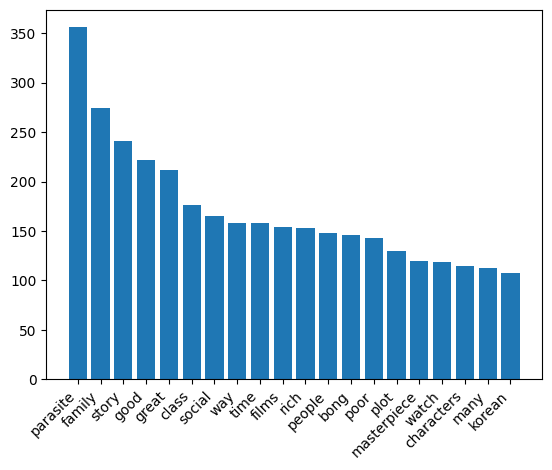

In [22]:
from wordcloud import WordCloud
import matplotlib.pylab as plt
key = sorted_word_cnt_filtered[:20]
cnt = [word_cnt_filtered[k] for k in key]

plt.bar(range(len(key)), cnt, tick_label=key)
plt.xticks(rotation=45, ha='right')
plt.show()

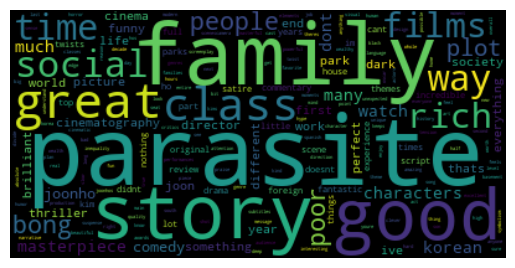

In [23]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate_from_frequencies(word_cnt_filtered)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [24]:
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from langdetect import detect

# CSV ÌååÏùº ÏùΩÍ∏∞
df = pd.read_csv('.data/parasite_reviews.csv')

# Ïñ∏Ïñ¥ Í∞êÏßÄ Ìï®Ïàò
def detect_language(text):
    try:
        return detect(str(text))
    except:
        return None

# ÏòÅÏñ¥ Î¶¨Î∑∞Îßå ÌïÑÌÑ∞ÎßÅ
df['language'] = df['review_text'].apply(detect_language)
df_review = df[df['language'] == 'en'].copy()
print(f"ÏòÅÏñ¥ Î¶¨Î∑∞: {len(df_review)}Í∞ú")

# Stopwords ÏÑ§Ï†ï
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))
extra_stop_words = ['movie', 'netflix', 'film', 'animation', 'movies', 'animated']
stop_words.update(extra_stop_words)

# Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò
lemmatizer = WordNetLemmatizer()
my_tag_set = {'NN', 'NNS', 'NNP', 'NNPS', 'JJ'}

def preprocess_text(text):
    # 1. ÏÜåÎ¨∏Ïûê Î≥ÄÌôò Î∞è ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞ (ÏòÅÎ¨∏Ïûê, Ïà´Ïûê, Í≥µÎ∞±Îßå Ïú†ÏßÄ)
    text = re.sub(r'[^a-z0-9\s]', '', text.lower())

    # 2. ÌÜ†ÌÅ∞Ìôî
    tokens = word_tokenize(text)

    # 3. Stopwords Ï†úÍ±∞ Î∞è Í∏∏Ïù¥ ÌïÑÌÑ∞ÎßÅ
    filtered_tokens = [token for token in tokens if token not in stop_words and len(token) > 1]

    # 4. Lemmatization (ÌëúÏ†úÏñ¥ Ï∂îÏ∂ú)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # 5. POS Tagging & ÌïÑÌÑ∞ÎßÅ
    pos_tags = pos_tag(lemmatized_tokens)
    final_tokens = [token for token, tag in pos_tags if tag in my_tag_set]

    return final_tokens

df_review['final_tokens'] = df_review['review_text'].apply(preprocess_text)


vectorizer_config = {
    'tokenizer': lambda x: x,
    'lowercase': False,
    'max_features': 500
}

# CountVectorizer Ïã§Ìñâ
cv = CountVectorizer(**vectorizer_config)
cv_matrix = cv.fit_transform(df_review['final_tokens'])
cv_top_features = cv.get_feature_names_out()

# TfidfVectorizer Ïã§Ìñâ
tfidf = TfidfVectorizer(**vectorizer_config)
tfidf_matrix = tfidf.fit_transform(df_review['final_tokens'])
tfidf_top_features = tfidf.get_feature_names_out()


# --- 5. Í≤∞Í≥º Ï∂úÎ†• ---
print("\n--- ÏµúÏ¢Ö Ï†ïÏ†úÎêú ÌÜ†ÌÅ∞ ÏÉÅÏúÑ ÌÇ§ÏõåÎìú ÎπÑÍµê ---")
print("\n[CountVectorizer Í≤∞Í≥º (Îã®Ïàú ÎπàÎèÑ)]")
print(cv_top_features[:20])

print("\n[TfidfVectorizer Í≤∞Í≥º (Ï§ëÏöîÎèÑ)]")
print(tfidf_top_features[:20])

ÏòÅÏñ¥ Î¶¨Î∑∞: 1293Í∞ú

--- ÏµúÏ¢Ö Ï†ïÏ†úÎêú ÌÜ†ÌÅ∞ ÏÉÅÏúÑ ÌÇ§ÏõåÎìú ÎπÑÍµê ---

[CountVectorizer Í≤∞Í≥º (Îã®Ïàú ÎπàÎèÑ)]
['ability' 'able' 'absolute' 'academy' 'act' 'action' 'actor' 'amazing'
 'american' 'amount' 'anyone' 'anything' 'art' 'asian' 'aspect'
 'attention' 'audience' 'award' 'awesome' 'bad']

[TfidfVectorizer Í≤∞Í≥º (Ï§ëÏöîÎèÑ)]
['ability' 'able' 'absolute' 'academy' 'act' 'action' 'actor' 'amazing'
 'american' 'amount' 'anyone' 'anything' 'art' 'asian' 'aspect'
 'attention' 'audience' 'award' 'awesome' 'bad']


c:\dataintelligence\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [25]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from langdetect import detect
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

id2word = corpora.Dictionary(df_review['final_tokens'])

corpus = [id2word.doc2bow(tokens) for tokens in df_review['final_tokens']]

# LDA Î™®Îç∏ ÏÉùÏÑ±
lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=5,
    random_state=100, # Í≤∞Í≥º Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌïú ÏÑ§Ï†ï
    update_every=1,
    chunksize=100,
    passes=10, # Ï†ÑÏ≤¥ ÏΩîÌçºÏä§Î•º Î™á Î≤à Î∞òÎ≥µ ÌïôÏäµÌï†ÏßÄ Í≤∞Ï†ï
    alpha='auto',
    per_word_topics=True
)

print("LDA Î™®Îç∏ ÌïôÏäµÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")


# --- 4. Í≤∞Í≥º ÌôïÏù∏ Î∞è ÏãúÍ∞ÅÌôî ---

# 4-1. ÌÖçÏä§Ìä∏Î°ú ÌÜ†ÌîΩ ÌôïÏù∏
print("\n--- Í∞Å ÌÜ†ÌîΩÎ≥Ñ Ï£ºÏöî Îã®Ïñ¥ ---")
topics = lda_model.print_topics(num_words=10) # Í∞Å ÌÜ†ÌîΩÎ≥ÑÎ°ú 10Í∞ú Îã®Ïñ¥ Ï∂úÎ†•
for topic in topics:
    print(topic)

# 4-2. pyLDAvisÎ•º ÏÇ¨Ïö©Ìïú Ïù∏ÌÑ∞ÎûôÌã∞Î∏å ÏãúÍ∞ÅÌôî
print("\nLDA ÏãúÍ∞ÅÌôî Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÍ≥† 'lda_visualization.html' ÌååÏùºÎ°ú Ï†ÄÏû•Ìï©ÎãàÎã§.")
pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis_data

LDA Î™®Îç∏ ÌïôÏäµÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.

--- Í∞Å ÌÜ†ÌîΩÎ≥Ñ Ï£ºÏöî Îã®Ïñ¥ ---
(0, '0.042*"parasite" + 0.019*"bong" + 0.016*"film" + 0.014*"time" + 0.014*"story" + 0.013*"great" + 0.013*"joonho" + 0.012*"masterpiece" + 0.012*"year" + 0.010*"director"')
(1, '0.016*"narrative" + 0.014*"joonhos" + 0.009*"direction" + 0.009*"unique" + 0.008*"visual" + 0.008*"love" + 0.008*"critic" + 0.008*"heart" + 0.007*"fun" + 0.007*"classic"')
(2, '0.039*"review" + 0.027*"spanish" + 0.025*"full" + 0.012*"star" + 0.009*"award" + 0.008*"violence" + 0.008*"minute" + 0.007*"hour" + 0.006*"weird" + 0.006*"tonal"')
(3, '0.025*"good" + 0.014*"class" + 0.014*"plot" + 0.013*"watch" + 0.012*"way" + 0.012*"social" + 0.011*"character" + 0.011*"story" + 0.011*"korean" + 0.009*"u"')
(4, '0.049*"family" + 0.021*"park" + 0.019*"poor" + 0.019*"rich" + 0.011*"house" + 0.009*"kim" + 0.008*"son" + 0.008*"basement" + 0.007*"kims" + 0.006*"life"')

LDA ÏãúÍ∞ÅÌôî Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÍ≥† 'lda_visualization.html' ÌååÏùºÎ°ú 

c:\dataintelligence\.venv\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.285415  0.064677       1        1  39.535512
3      0.148505 -0.215731       2        1  30.221381
4     -0.183677 -0.168009       3        1  15.430080
1     -0.031348  0.231029       4        1   8.382038
2     -0.218894  0.088034       5        1   6.430988, topic_info=           Term        Freq       Total Category  logprob  loglift
150      family  233.000000  233.000000  Default  30.0000  30.0000
68     parasite  417.000000  417.000000  Default  29.0000  29.0000
900      review   58.000000   58.000000  Default  28.0000  28.0000
215        good  197.000000  197.000000  Default  27.0000  27.0000
8          bong  169.000000  169.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
1594        cut    4.248228    5.135449   Topic5  -5.8533   2.5544
1362  portrayal    3.939945    4.767498   Topic5  -5.9286   2.5534
940        full   37.017905   63.178103   Topic5  -3.6884   2.2095
372        hour    9.665064   19.661906   Topic5  -5.0313   2.0339
369        hand    5.226320    9.102625   Topic5  -5.6461   2.1892

[245 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1250      5  0.858749   academy
397       2  0.988481   amazing
947       2  0.984786  anything
239       5  0.946076     award
617       3  0.979270  basement
...     ...       ...       ...
265       1  0.351013      work
265       2  0.638205      work
265       4  0.010637      work
233       2  0.976786     worth
524       1  0.994810      year

[268 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 5, 2, 3])